In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from pandas_visual_analysis import VisualAnalysis

In [2]:
AQ = pd.read_excel('C:/Users/Arya/Desktop/AQ.xlsx')
AQ.head() # first five rows display

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [3]:
AQ.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2005-04-04,14:00:00,2.2,1070.75,-200,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


In [4]:
AQ.dropna(axis=0, how= 'all', inplace=True)
AQ.dropna(axis=1, inplace=True)

In [5]:
AQ.replace(to_replace= -200, value= np.NaN, inplace= True)
AQ

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,NaN,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,NaN,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,NaN,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,NaN,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [6]:
AQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         7674 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   NMHC(GT)       914 non-null    float64       
 5   C6H6(GT)       8991 non-null   float64       
 6   PT08.S2(NMHC)  8991 non-null   float64       
 7   NOx(GT)        7718 non-null   float64       
 8   PT08.S3(NOx)   8991 non-null   float64       
 9   NO2(GT)        7715 non-null   float64       
 10  PT08.S4(NO2)   8991 non-null   float64       
 11  PT08.S5(O3)    8991 non-null   float64       
 12  T              8991 non-null   float64       
 13  RH             8991 non-null   float64       
 14  AH             8991 non-null   float64       
dtypes: datetime64[ns](1),

In [7]:
AQ=AQ.dropna()
print(AQ.isnull().sum())

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [8]:
AQ.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000
mean,2.353567,1207.741838,231.025393,10.772367,965.983777,143.501814,963.178053,100.259976,1600.506550,1045.691052,15.599859,49.049557,0.831851
std,1.409496,241.826753,208.461912,7.417127,266.413137,81.829717,265.906153,31.493823,302.290036,400.130277,4.825555,15.266995,0.178506
min,0.300000,752.500000,7.000000,0.542781,447.500000,12.000000,461.250000,19.000000,955.000000,263.000000,6.275000,14.900000,0.402317
25%,1.300000,1016.875000,77.000000,4.804320,753.500000,81.000000,768.875000,78.500000,1369.125000,759.500000,11.875000,36.700000,0.718949
50%,2.000000,1172.000000,157.000000,9.125831,944.250000,128.000000,920.000000,99.000000,1556.250000,1009.000000,15.025000,49.550000,0.817693
75%,3.100000,1380.250000,318.500000,14.803204,1142.375000,187.000000,1131.000000,122.000000,1783.375000,1319.750000,18.350000,60.525001,0.927524
max,8.100000,2039.750000,1189.000000,39.202340,1754.250000,478.000000,1934.500000,196.000000,2679.000000,2358.500000,30.000000,83.224998,1.485238


In [9]:
AQ.corr()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.936258,0.887167,0.972672,0.958444,0.951342,-0.823709,0.861432,0.939922,0.882942,0.318468,-0.105195,0.295589
PT08.S1(CO),0.936258,1.000000,0.781758,0.931404,0.936364,0.922894,-0.829552,0.866574,0.945006,0.935004,0.324937,-0.039592,0.407018
NMHC(GT),0.887167,0.781758,1.000000,0.897971,0.875056,0.811182,-0.774207,0.728052,0.848499,0.761909,0.367081,-0.160308,0.282137
C6H6(GT),0.972672,0.931404,0.897971,1.000000,0.984795,0.927335,-0.848710,0.846740,0.960851,0.896992,0.418266,-0.178082,0.313606
PT08.S2(NMHC),0.958444,0.936364,0.875056,0.984795,1.000000,0.926643,-0.910622,0.885027,0.957882,0.909109,0.445724,-0.193355,0.325284
NOx(GT),0.951342,0.922894,0.811182,0.927335,0.926643,1.000000,-0.814288,0.857425,0.912718,0.893379,0.238500,-0.042020,0.270676
PT08.S3(NOx),-0.823709,-0.829552,-0.774207,-0.848710,-0.910622,-0.814288,1.000000,-0.815213,-0.880199,-0.857531,-0.424083,0.096870,-0.463007
NO2(GT),0.861432,0.866574,0.728052,0.846740,0.885027,0.857425,-0.815213,1.000000,0.807764,0.839648,0.406911,-0.223035,0.214562
PT08.S4(NO2),0.939922,0.945006,0.848499,0.960851,0.957882,0.912718,-0.880199,0.807764,1.000000,0.918977,0.343745,0.012343,0.515559
PT08.S5(O3),0.882942,0.935004,0.761909,0.896992,0.909109,0.893379,-0.857531,0.839648,0.918977,1.000000,0.313561,-0.014575,0.440171


In [10]:
print('mode value for COGT column is', AQ['CO(GT)'].mode()[0])
print('mode value for PT08.S1(CO) column is' , AQ['PT08.S1(CO)'].mode()[0])
print('mode value for NMHC(GT) column is' , AQ['NMHC(GT)'].mode()[0])
print('mode value for C6H6(GT) column is' , AQ['C6H6(GT)'].mode()[0])
print('mode value for PT08.S2(NMHC) column is' , AQ['PT08.S2(NMHC)'].mode()[0])
print('mode value for NOx(GT) column is' , AQ['NOx(GT)'].mode()[0])
print('mode value for PT08.S3(NOx) column is' , AQ['PT08.S3(NOx)'].mode()[0])
print('mode value for NO2(GT) column is' , AQ['NO2(GT)'].mode()[0])
print('mode value for PT08.S4(NO2) column is' , AQ['PT08.S4(NO2)'].mode()[0])
print('mode value for PT08.S5(O3) column is' , AQ['PT08.S5(O3)'].mode()[0])
print('mode value for T column is' , AQ['T'].mode()[0])
print('mode value for RH column is' , AQ['RH'].mode()[0])
print('mode value for AH column is' , AQ['AH'].mode()[0])

mode value for COGT column is 1.9
mode value for PT08.S1(CO) column is 983.5
mode value for NMHC(GT) column is 66.0
mode value for C6H6(GT) column is 5.247305750259137
mode value for PT08.S2(NMHC) column is 775.75
mode value for NOx(GT) column is 61.0
mode value for PT08.S3(NOx) column is 579.0
mode value for NO2(GT) column is 114.0
mode value for PT08.S4(NO2) column is 1267.5
mode value for PT08.S5(O3) column is 789.5
mode value for T column is 10.975000143051
mode value for RH column is 26.5
mode value for AH column is 0.4023168089194366


In [11]:
from pandas_visual_analysis import VisualAnalysis
VisualAnalysis(AQ)

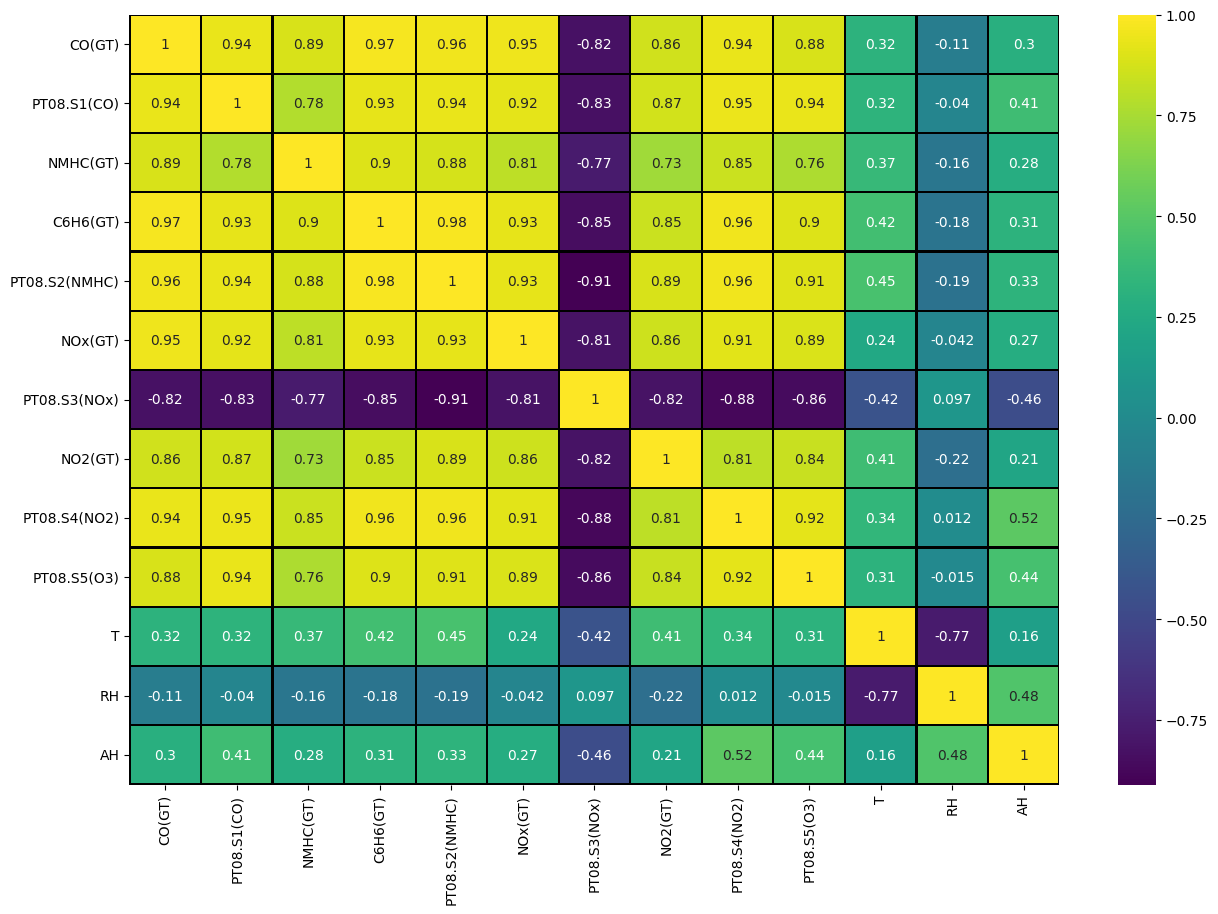

In [12]:
corrr = AQ.corr()
plt.figure(figsize=(15,10))
#heat map
a = sns.heatmap(AQ.corr(),annot=True,cmap='viridis',linecolor='k',linewidth=0.9)

In [13]:
features = ['CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T'] # X
X = AQ.loc[:, features]
y = AQ.loc[:, ['RH']]

In [14]:
AQ.shape[0]

827

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,train_size=.75)

In [16]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(620, 11) (207, 11) (620, 1) (207, 1)


In [17]:
#from sklearn.linear_model import LinearRegression
Lin = LinearRegression()
Lin.fit(X_train, y_train)

LinearRegression()

In [18]:
print("predicted values of  are RH :", Lin.predict(X_test))
y_pred = Lin.predict(X_test)
y_pred.shape

predicted values of  are RH : [[ 61.81962212]
 [ 38.95839498]
 [ 58.80237825]
 [ 50.04190709]
 [ 56.05962261]
 [ 48.53619826]
 [ 54.10312982]
 [ 58.52251573]
 [ 48.26362995]
 [ 46.75864241]
 [ 46.89879683]
 [ 39.57522006]
 [ 67.29899071]
 [ 60.73723972]
 [ 32.83370291]
 [ 58.0405698 ]
 [ 62.42850544]
 [ 53.21403515]
 [ 36.91309884]
 [ 32.34546615]
 [ 40.29539038]
 [ 65.0359144 ]
 [ 28.07638355]
 [ 48.70696053]
 [ 56.21139769]
 [ 41.29435926]
 [ 60.32247404]
 [ 63.28729847]
 [ 58.85037338]
 [ 58.0881429 ]
 [ 55.5850352 ]
 [ 41.3095528 ]
 [ 57.48956454]
 [ 58.93590295]
 [ 64.04524608]
 [ 34.87056278]
 [ 29.44396725]
 [ 70.65792488]
 [ 64.13720989]
 [ 41.75807627]
 [ 46.86297145]
 [ 66.701863  ]
 [ 50.589258  ]
 [ 63.33279569]
 [ 60.99710676]
 [ 64.50941088]
 [ 66.1454028 ]
 [ 42.58463494]
 [ 20.02216486]
 [ 60.42909406]
 [ 68.2265618 ]
 [ 38.5865055 ]
 [ 66.30369097]
 [ 62.28149973]
 [ 39.55005646]
 [ 51.38166568]
 [ 51.52552511]
 [ 49.69923506]
 [ 24.62780922]
 [ 13.87362721]
 [ 55.7221

(207, 1)

In [19]:

n = len(y)
k = X.shape[1]
print(k)

11


In [20]:
r2=Lin.score(X_test, y_test)
print("R^2 score for linear regression" , r2)
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print("adjusted R^2 score", adj_r2)

R^2 score for linear regression 0.7975201321269237
adjusted R^2 score 0.7947872750145264


In [21]:
slope = Lin.coef_
print("coefficients" ,slope) # slope

coefficients [[-1.22452415 -0.00676257  0.00442573 -1.72406656 -0.06258984 -0.02567232
  -0.0058545   0.07065866  0.10695265  0.00254239 -2.25343651]]


In [22]:
b0 = Lin.intercept_
print("intercept", b0)

intercept [1.4281998]


In [23]:
MSE = mean_squared_error(y_test, y_pred)
print("mean squared error" , MSE)

mean squared error 46.9456374949635


In [24]:
cod = r2_score(y_test, y_pred)
print("Coefficeient of determination", cod)

Coefficeient of determination 0.7975201321269237


In [25]:
Accuracy= r2_score(y_test,y_pred)*100
print("Accuracy of the model" , Accuracy,'%')

Accuracy of the model 79.75201321269238 %


In [26]:
Residue = (y_test-y_pred)
print("The residuals are" , Residue)

The residuals are             RH
870   5.005379
114  -4.908395
8     0.872621
384  -4.491907
868   2.990378
...        ...
486  -4.714940
302   5.665860
1078  0.112278
108  -1.281266
796   1.253483

[207 rows x 1 columns]


In [27]:
variance = np.sum(Residue**2)/(len(y_test) - k)
print("variance", variance)

variance RH    49.580342
dtype: float64


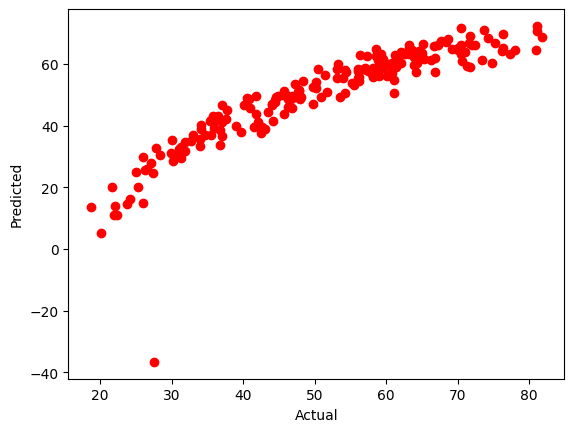

In [28]:
plt.scatter(y_test,y_pred,color='red')
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.show()

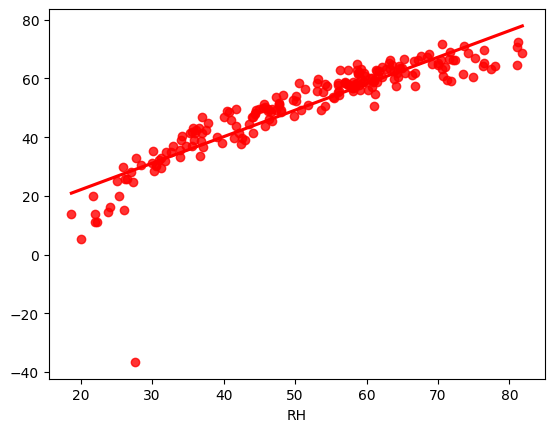

In [29]:
sns.regplot(x=y_test, y=y_pred,ci=None,color='red');

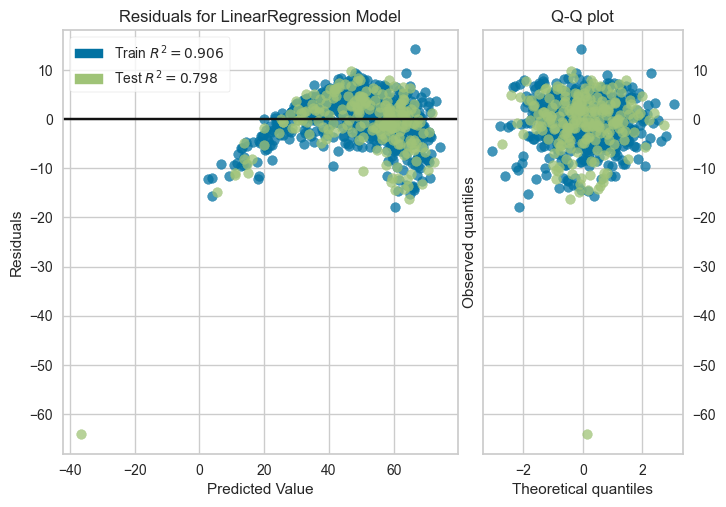

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [30]:
from yellowbrick.regressor import ResidualsPlot
model = LinearRegression()
residual = ResidualsPlot(model, hist=False, qqplot= True)
residual.fit(X_train, y_train)
residual.score(X_test, y_test)
residual.show()

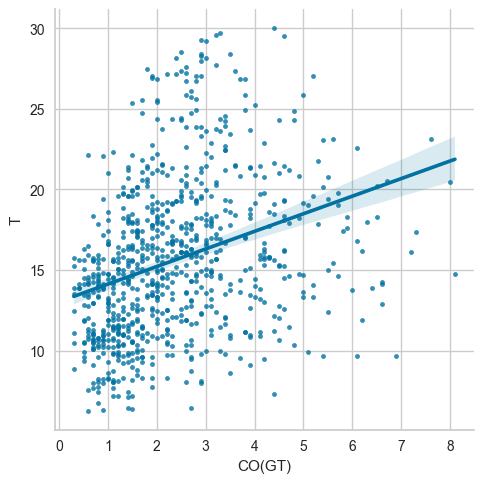

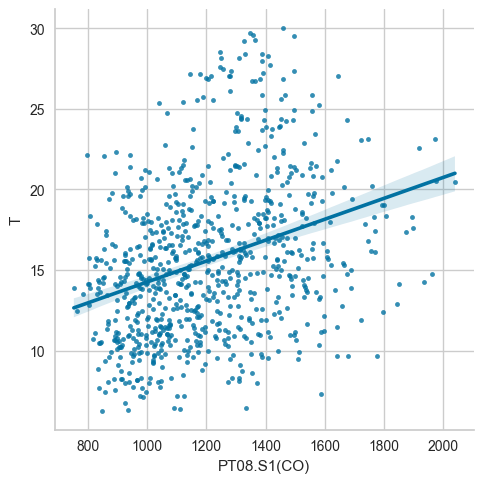

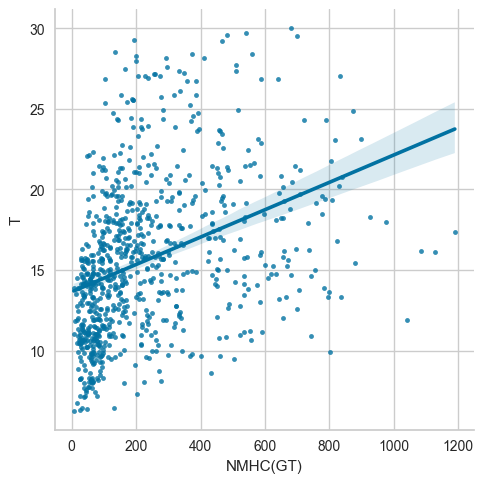

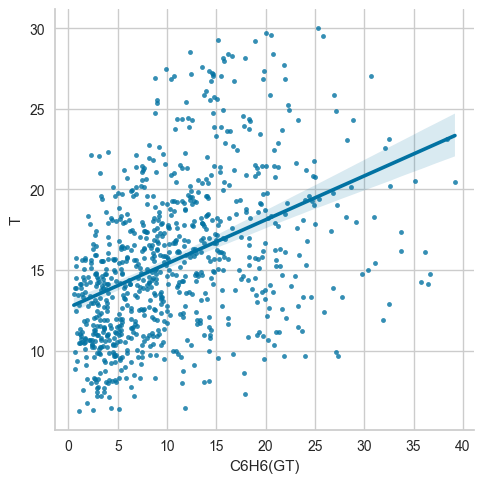

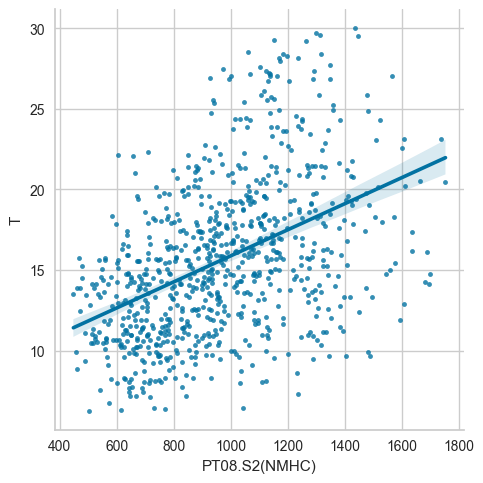

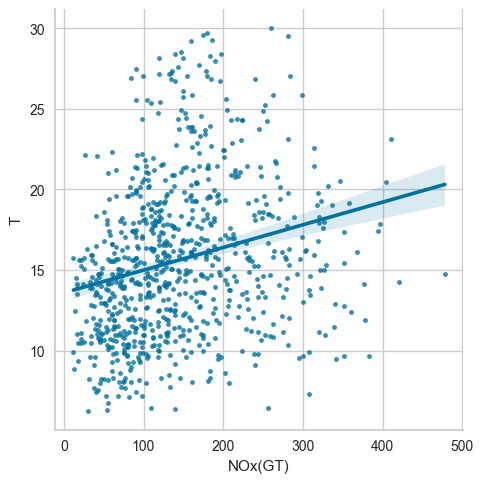

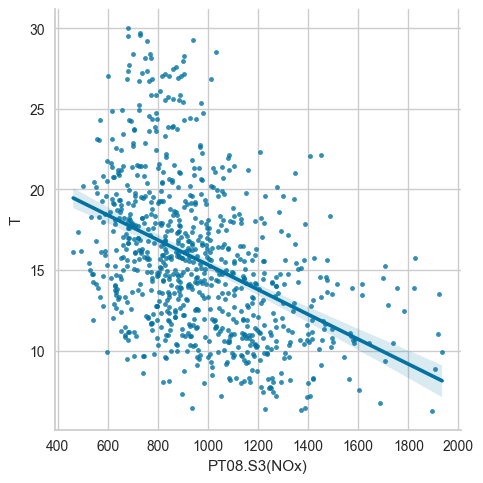

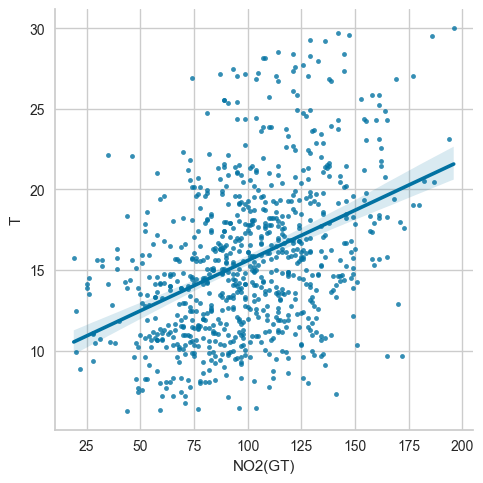

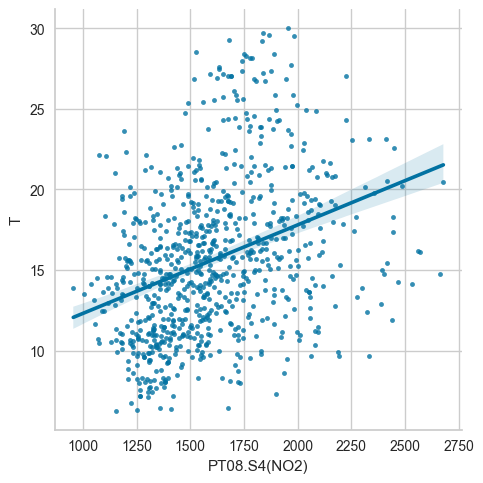

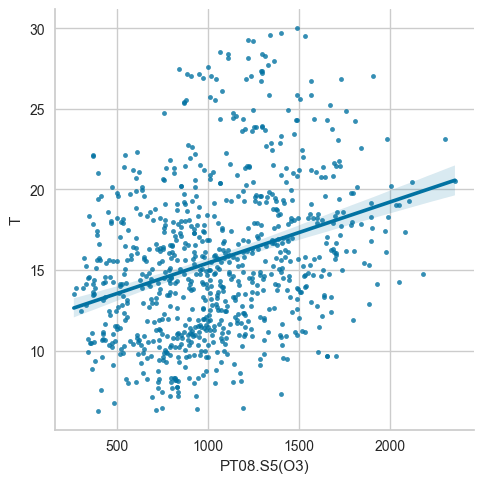

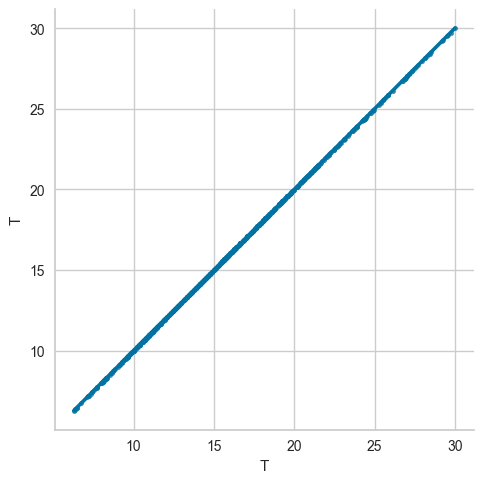

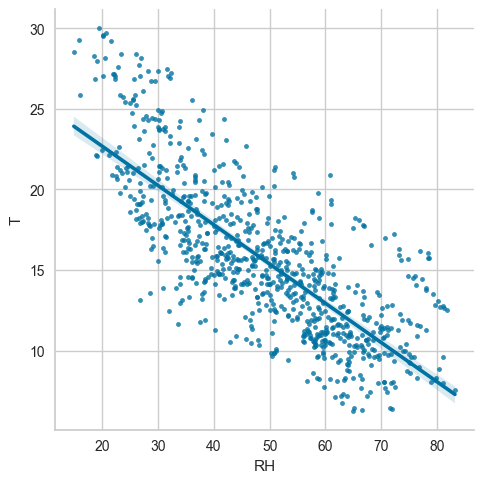

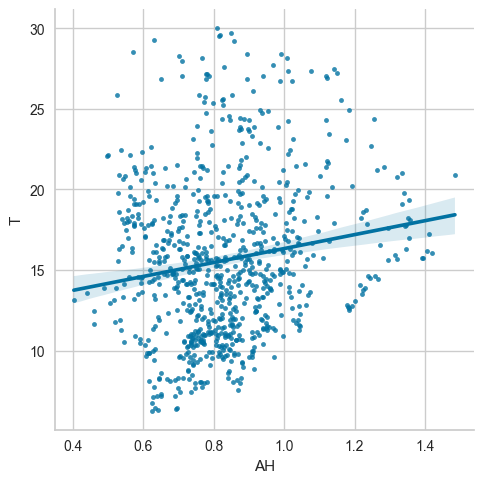

In [31]:
col_=AQ.columns.tolist()[2:]
for i in AQ.columns.tolist()[2:]:
    sns.lmplot(x=i,y='T',data=AQ,markers='.')

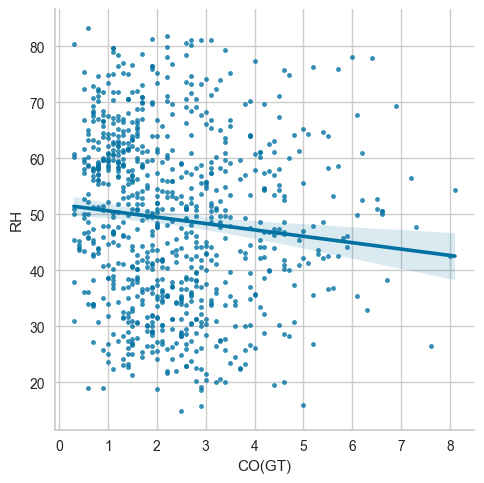

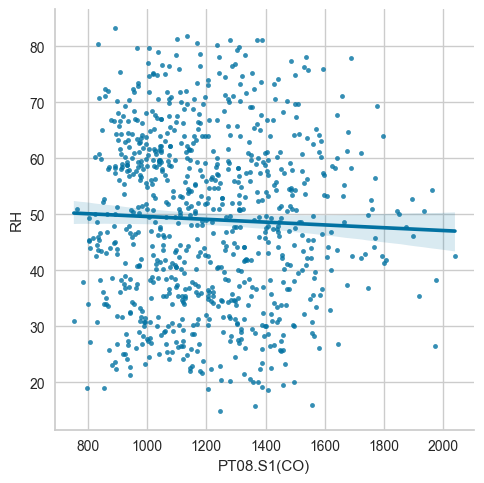

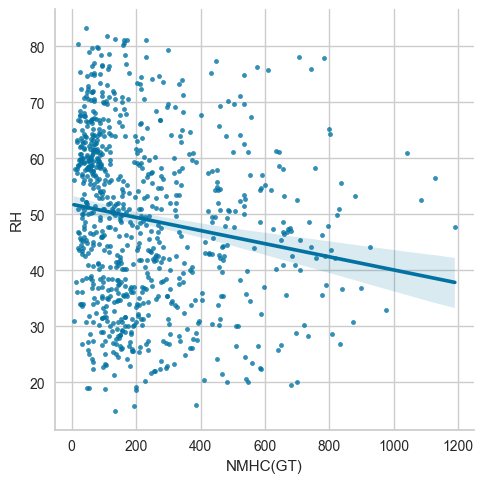

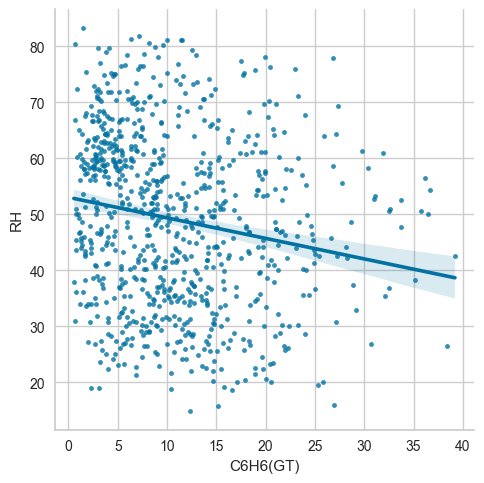

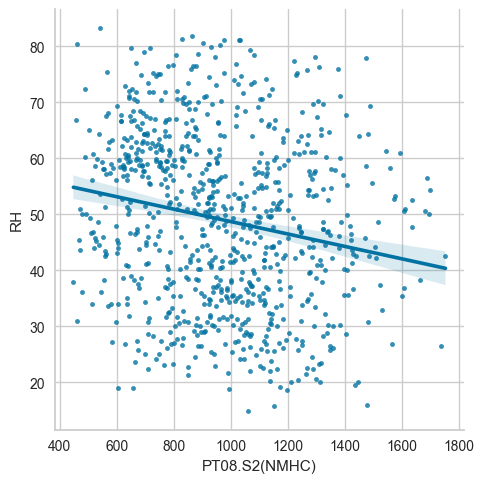

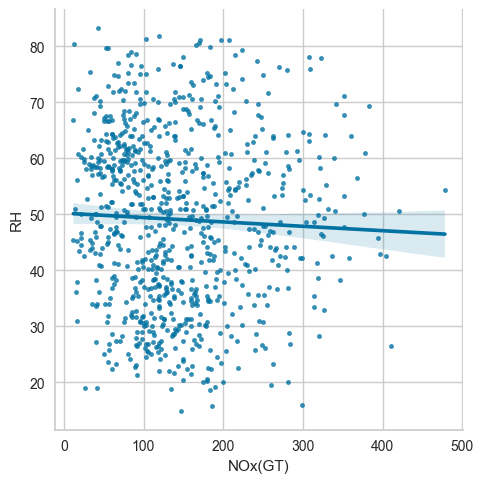

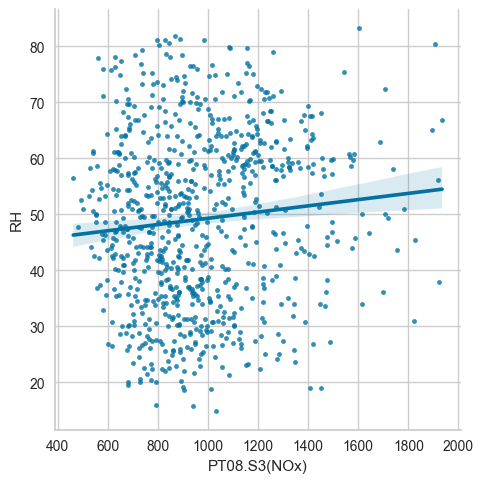

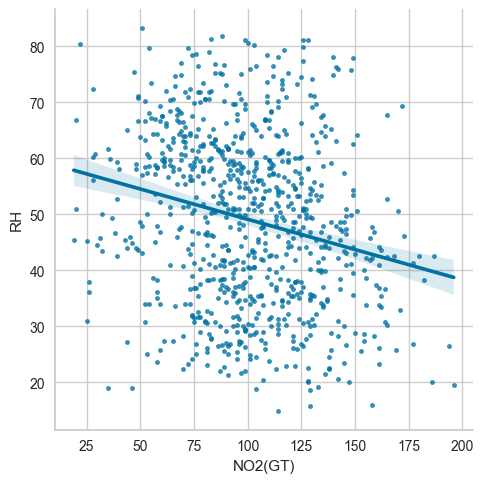

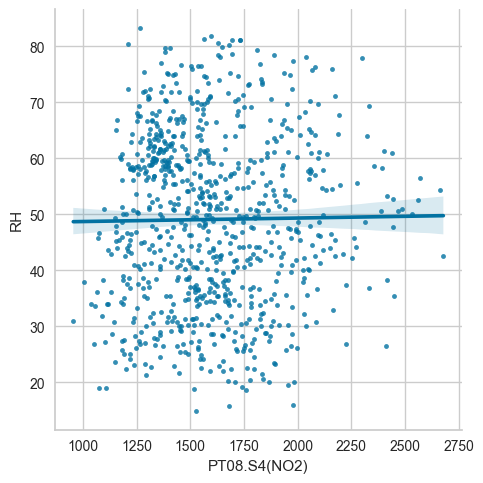

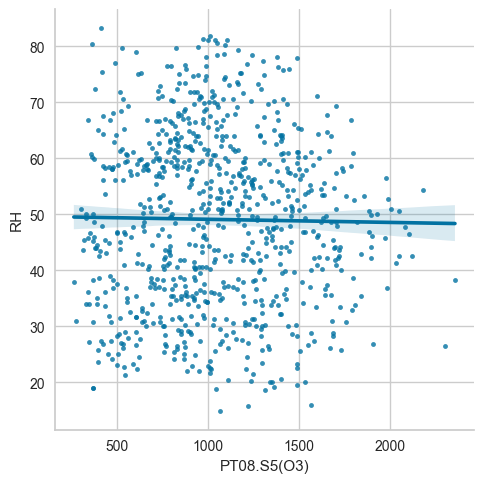

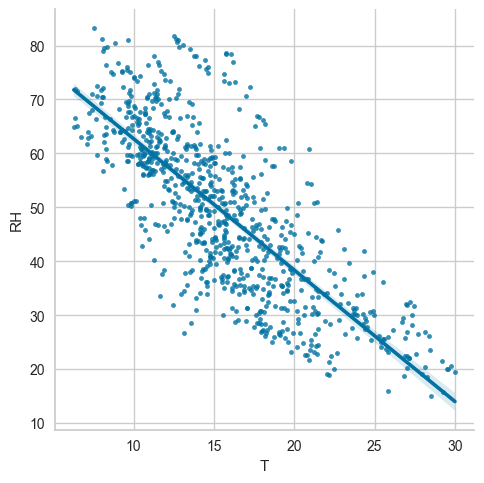

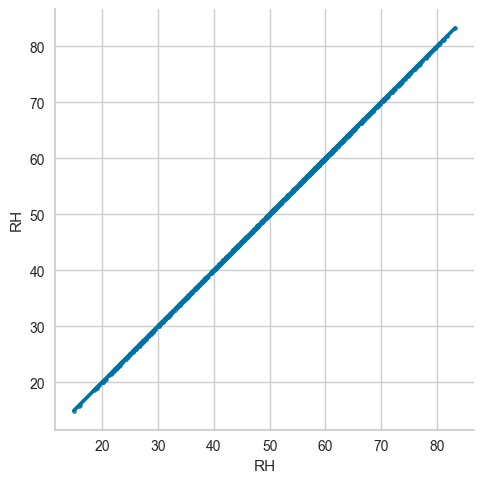

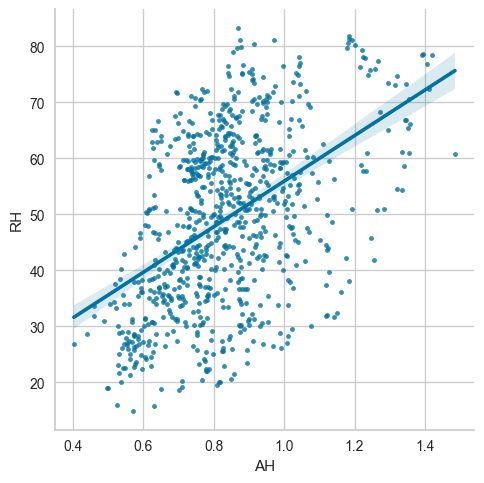

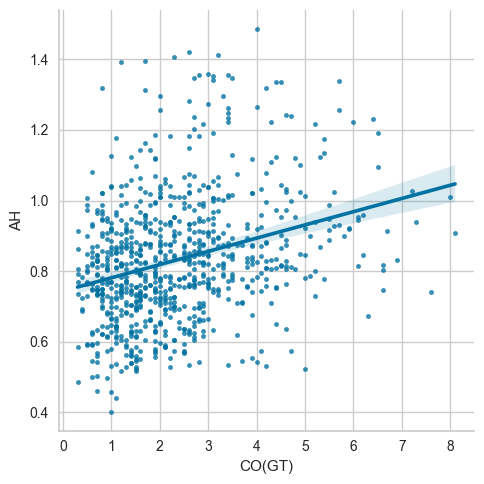

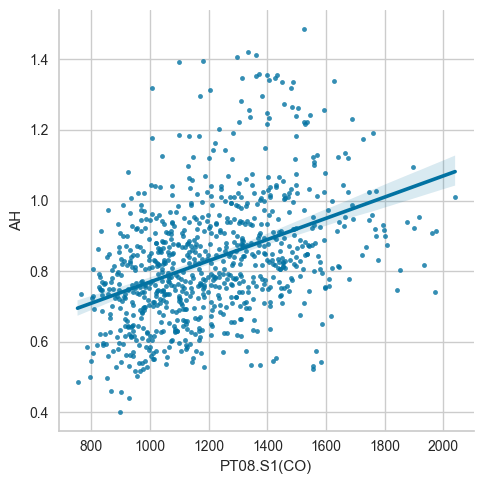

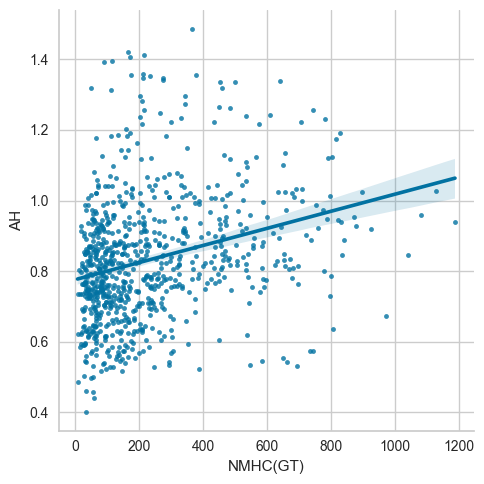

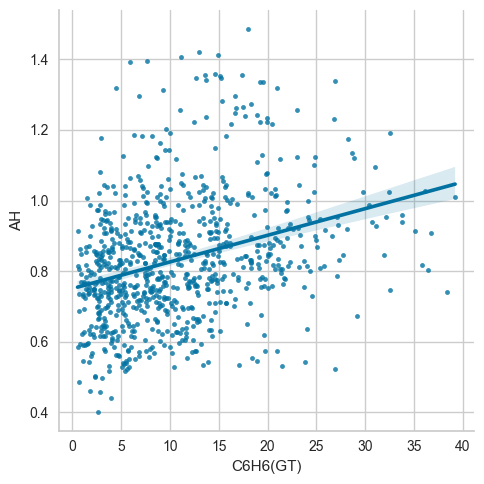

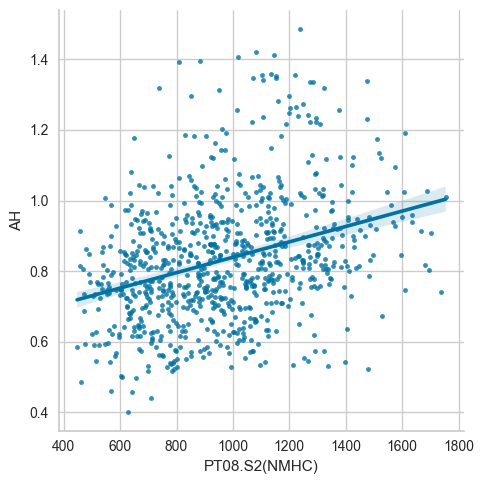

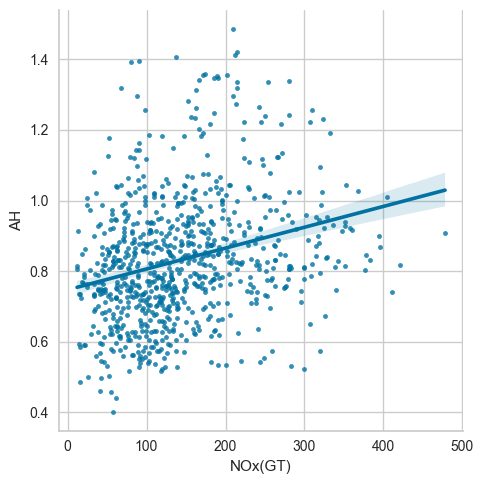

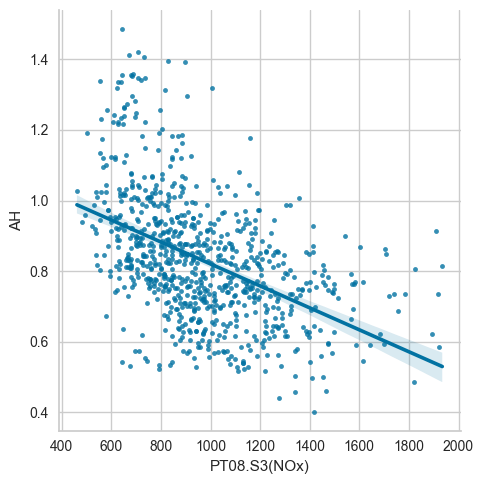

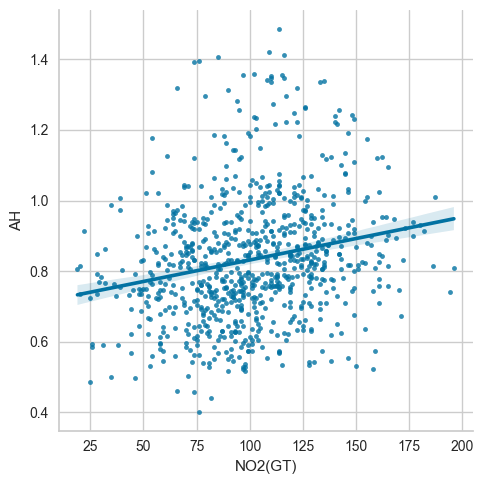

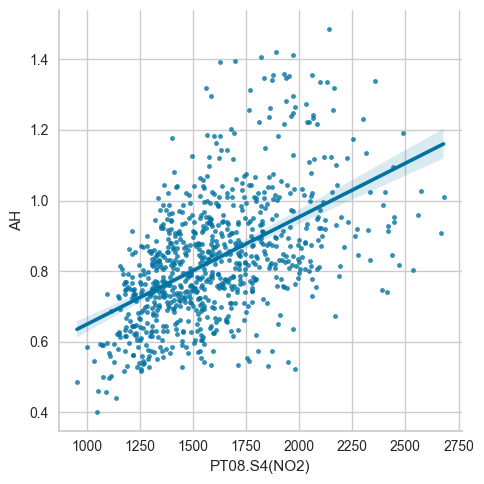

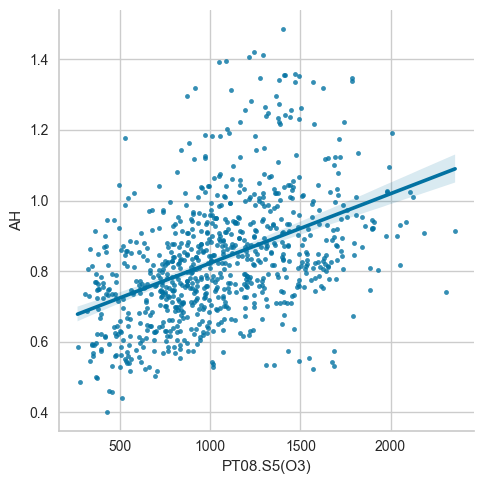

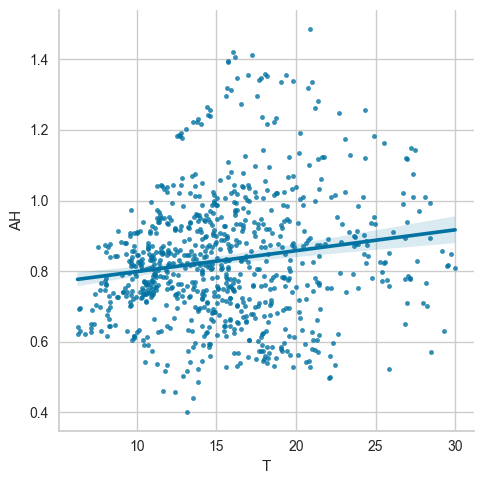

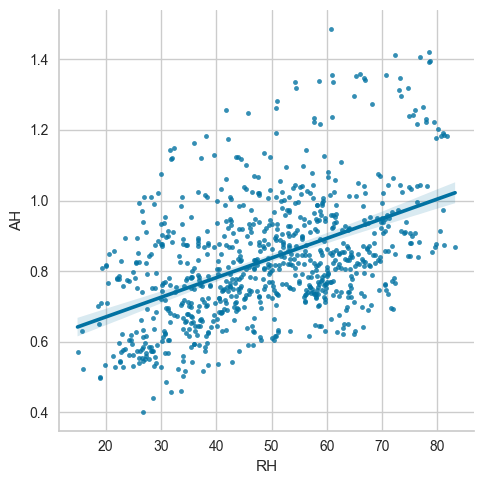

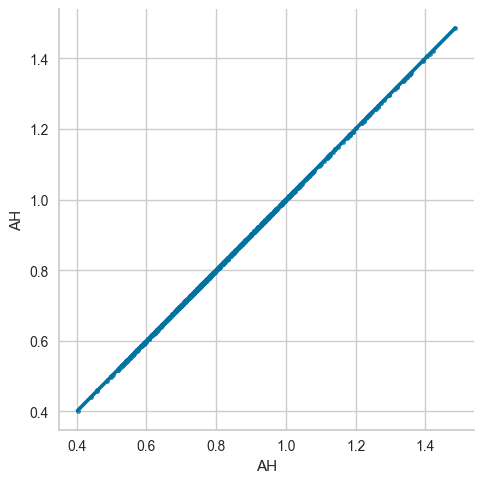

In [32]:
col_=AQ.columns.tolist()[2:]
for i in AQ.columns.tolist()[2:]:
    sns.lmplot(x=i,y='RH',data=AQ,markers='.')
for j in AQ.columns.tolist()[2:]:
    sns.lmplot(x=j,y='AH',data=AQ,markers='.')

Text(0.5, 1.0, 'histogram for Relative Humdidity')

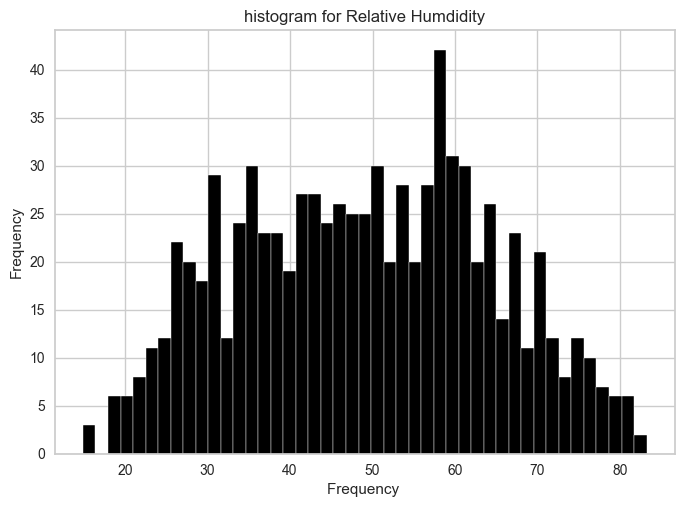

In [33]:
plt.hist(AQ["RH"], color="black", edgecolor="white", bins=int(45/1))
plt.xlabel('Frequency ')
plt.ylabel('Frequency')
plt.title('histogram for Relative Humdidity')

In [34]:
import statsmodels.api as sm
X_train1=sm.add_constant(X_train)
X_test1=sm.add_constant(X_test)
ols_model=sm.OLS(y_train,X_train1)
ols_results=ols_model.fit()
#y_pred_train=ols_results.predict(X_train1)
y_pred_test=ols_results.predict(X_test1)
print(ols_results.summary())
print("prediction",y_pred_test)

                            OLS Regression Results                            
Dep. Variable:                     RH   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     534.4
Date:                Thu, 04 May 2023   Prob (F-statistic):          5.36e-304
Time:                        14:20:19   Log-Likelihood:                -1832.4
No. Observations:                 620   AIC:                             3689.
Df Residuals:                     608   BIC:                             3742.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.4282     10.125      0.141

In [35]:
f_statistic = ols_results.fvalue
p_value = ols_results.f_pvalue
print('F-statistic:' , f_statistic)
print('p-value:' , p_value)

F-statistic: 534.4356328281713
p-value: 5.364866704468549e-304


In [36]:
from scipy.stats import f
n = len(y)
k = X_train.shape[1]
X = np.concatenate([np.ones((n, 1)), X], axis=1)
rss = np.sum((y_test - y_pred)**2)
tss = np.sum((y_test - np.mean(y))**2)
f_statistic = ((tss - rss) / k) / (rss / (n - k - 1))
p_value = f.sf(f_statistic, k, n - k - 1)
print('F-statistic: ', f_statistic)
print('p-value: ', p_value)

F-statistic:  RH    300.8848
dtype: float64
p-value:  [4.30276149e-278]


In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from statsmodels.api import OLS, add_constant
scaler=StandardScaler()
X0=scaler.fit_transform(X_train)
X9 = scaler.transform(X_test)
vif=pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X0, i) for i in range(X0.shape[1])]
vif["features"] = X_train.columns
print("vif", vif)
ridge=Ridge(alpha=0.05)
ridge.fit(X0, y_train)
y_pred_r=ridge.predict(X9)
r2_r=r2_score(y_test, y_pred_r)
mse1=mean_squared_error(y_test,y_pred_r)
adj_r21 = 1 - ((1 - r2_r) * (n - 1) / (n - k - 1))
print("r-squared", r2_r)
print("mse", mse1)
print("adj_R",adj_r21)
print("temperature prediction", y_pred_r)

vif     VIF Factor       features
0    40.453123         CO(GT)
1    23.229706    PT08.S1(CO)
2     6.402638       NMHC(GT)
3   154.876442       C6H6(GT)
4   168.280384  PT08.S2(NMHC)
5    14.119951        NOx(GT)
6    19.441543   PT08.S3(NOx)
7     7.981065        NO2(GT)
8    34.929595   PT08.S4(NO2)
9    12.130696    PT08.S5(O3)
10    2.011350              T
r-squared 0.7979912966311536
mse 46.836396422019206
adj_R 0.7952647987942735
temperature prediction [[ 61.79945485]
 [ 38.9416852 ]
 [ 58.80347532]
 [ 50.07082969]
 [ 56.05394525]
 [ 48.53617726]
 [ 54.12449309]
 [ 58.47117262]
 [ 48.26066336]
 [ 46.79292932]
 [ 46.8718475 ]
 [ 39.59319934]
 [ 67.27610514]
 [ 60.7410332 ]
 [ 32.84117553]
 [ 58.04776225]
 [ 62.47573347]
 [ 53.21828852]
 [ 36.92009761]
 [ 32.33992016]
 [ 40.29688964]
 [ 65.00024291]
 [ 28.10968546]
 [ 48.71318331]
 [ 56.20715575]
 [ 41.29356201]
 [ 60.32149244]
 [ 63.27830604]
 [ 58.83731582]
 [ 58.07894705]
 [ 55.5558996 ]
 [ 41.29936878]
 [ 57.48118774]
 [ 58.92

In [38]:
#AQ1 = add_constant(AQ)
vif1=pd.DataFrame()
vif1["VIF Factor"] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
vif1["features"] = X_train.columns
print("vif", vif1)


vif     VIF Factor       features
0   153.773946         CO(GT)
1   554.295969    PT08.S1(CO)
2    13.842810       NMHC(GT)
3   132.223094       C6H6(GT)
4   782.943804  PT08.S2(NMHC)
5    57.137876        NOx(GT)
6    37.127758   PT08.S3(NOx)
7    87.749821        NO2(GT)
8   646.071789   PT08.S4(NO2)
9    90.418582    PT08.S5(O3)
10   23.574563              T


In [39]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.05)
lasso.fit(X0,y_train)
yl=lasso.predict(X9)
rl=r2_score(y_test,yl)
adj=1 - ((1 - rl) * (n - 1) / (n - k - 1))
print("msel",mean_squared_error(y_test,yl))
print("r2", rl)
print("adj", adj)
selected_indices = lasso.coef_ != 0
selected_features = X_train.columns[selected_indices]
#selected_vars = [features[i] for i in range(len(selected_indices)) if selected_indices[i]]
print('Selected features: ', selected_features)
print("coefficient", lasso.coef_)
print("predicted vaue", yl)

msel 43.985931614837746
r2 0.8102855537407068
adj 0.8077249906623605
Selected features:  Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T'],
      dtype='object')
coefficient [ -1.50406737  -0.27183986   0.46297105 -12.68351354 -13.9404999
  -1.92879707  -1.54564494   0.97719801  29.78260377   0.60872853
 -10.89821887]
predicted vaue [ 60.97557982  38.58651778  59.33160905  50.64045696  55.63233767
  48.2691443   54.75749076  57.44505076  48.22779511  46.88147621
  46.05914344  39.71432842  66.5468149   60.27246517  33.3445291
  58.56619835  63.7252892   53.09266876  36.72137305  31.64215817
  40.07451365  63.83155058  29.11444545  48.27577675  56.11284988
  41.04012172  60.66213268  62.35735734  58.94071348  57.67012145
  54.68697509  40.82395908  58.02789076  58.43299526  63.04874414
  35.9221522   28.91099477  70.4423351   63.38522304  43.28707887
  47.0546063   68.21537437 